# Análisis geografico / regional

In [6]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely
import shapely.wkt
from shapely.geometry import Point
from shapely.geometry import Polygon
import math

Solo los eventos "visited site" especifican pais

In [100]:
visitas = df.loc[df["event"] == "visited site", ['person', 'country', 'city', 'region']]

Text(0,0.5,'')

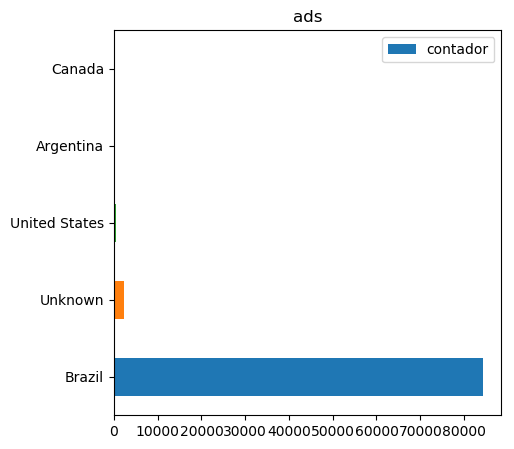

In [105]:
def filtrar_paises(paises):
    p = []
    for c in paises: 
        p.append(c if c == "Brazil" else "Others")
    return p

visitas_paises = visitas.copy()
visitas_paises["contador"] = 1
#visitas_paises["country"] = filtrar_paises(visitas["country"])
visitas_paises.groupby(by="country").agg({"contador":"count"})\
    .sort_values(by="contador",ascending=False).head(5).plot(
    kind="barh",y="contador",figsize=(5,5),title="ads",).set_ylabel("")

In [ ]:
america=gpd.read_file('gadm36_BRA_1.shp')
regiones_brasil= df.loc[(pd.notna(df['region'])) & (df['region']!='Unknown')&(df['country']=='Brazil'),['person','region','event']]
regiones_brasil.head(5)

In [ ]:
regiones_brasil['event'].value_counts()

In [ ]:
regiones_brasil['region'].value_counts()

In [ ]:
regiones_brasil_ingresos = regiones_brasil.groupby('region').agg({'person': 'count'})
regiones_brasil_ingresos

In [ ]:
america=america.rename(columns={'NAME_1':'region'})

In [ ]:
brasil_mapa= america.loc[:,['region','geometry']].reindex()

In [ ]:
brasil_mapa.head(5)

In [ ]:
#sacamos las tildes del geopandas.dataframe para que coincidan con las regiones del set de datos
brasil_mapa['region'][2]='Amapa'
brasil_mapa['region'][5]='Ceara'
brasil_mapa['region'][6]='Federal District'
brasil_mapa['region'][7]='Espirito Santo'
brasil_mapa['region'][8]='Goias'
brasil_mapa['region'][9]='Maranhao'
brasil_mapa['region'][13]='Para'
brasil_mapa['region'][15]='Parana'
brasil_mapa['region'][17]='Piaui'
brasil_mapa['region'][21]='Rondonia'
brasil_mapa['region'][24]='Sao Paulo'


In [ ]:
brasil_merge=pd.merge(brasil_mapa, regiones_brasil_ingresos, on='region', how='left')

In [ ]:
plot = brasil_merge.plot(legend=True,column='person',cmap='OrRd', scheme="Quantiles", figsize= (12,9),edgecolor='black')
plot.set_title('Visited site por region', fontsize=20);
plot.set_xlabel('Latitud ', fontsize=18)
plot.set_ylabel('Longitud', fontsize=18)